In [ ]:
#importing the necessary modules.
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.6.0


In [ ]:
from tensorflow import keras
print("Keras version", keras.__version__)

Keras version 2.6.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Set the random seed for tf and np
#so as to reuse the same set of random variables and reproduce the results.
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Loading the Dataset
#Get the fashion mnist dataset module from keras using keras.datasets.fashion_mnist.
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
#Load and sort the data into train and test sets using load_data()
#REf: https://keras.io/api/datasets/fashion_mnist/
#Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# 60,000 grayscale images, each 28x28 pixels.
X_train_full.shape

(60000, 28, 28)

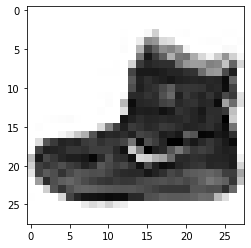

In [ ]:
#Splitting the Data
#see an image from the dataset using plt.imshow.
plt.imshow(X_train_full[0], cmap='Greys')

In [ ]:
#see the class of the image
print ("item0", y_train_full[0])

item0 9


In [ ]:
#Slice the first samples from 55000 of the X_train_full store these samples in X_train.
X_train = X_train_full[:55000]

In [ ]:
y_train = y_train_full[:55000]

In [ ]:
#slice the remaining samples from the X_train_full and store these samples in X_valid
X_valid = X_train_full[55000:]
y_valid = y_train_full[55000:]

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
a = np.array(
[
    [
        [10,11],
        [10,11]
    ],
    [
        [20,21],
        [20,21]
    ],
    [
        [30,31],
        [30,31]
    ]
]
)

In [ ]:
a.shape

(3, 2, 2)

In [ ]:
print(a.mean())

20.5


In [ ]:
print(a.mean(axis=0))

[[20. 21.]
 [20. 21.]]


In [ ]:
print(a.mean(axis=1))

[[10. 11.]
 [20. 21.]
 [30. 31.]]


In [ ]:
print(a.std())

8.180260794538684


In [ ]:
print(a.std(axis=0))

[[8.16496581 8.16496581]
 [8.16496581 8.16496581]]


In [ ]:
print(a.mean(axis=1))

[[10. 11.]
 [20. 21.]
 [30. 31.]]


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#Get the mean
X_mean = X_train.mean(axis=0)
print(X_mean.shape)

(28, 28)


In [ ]:
X_std = X_train.std(axis=0)
print(X_std.shape)

(28, 28)


In [ ]:
#Normalize
X_train = (X_train - X_mean) / X_std

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#normalize the X_valid
X_valid = (X_valid - X_mean) / X_std

In [ ]:
X_test = (X_test - X_mean) / X_std

In [ ]:
#convolutional layer --> increase the dimensionality so that everything will be one batch each
#increase the dimensionality - using np.newaxis
# Why?? This is the first layer of our classifier we are going to build later
#expects the input to be 4 dimensional: (batch size, filters or channels, width, height)

In [ ]:
X_train = X_train[:,:,:, np.newaxis]
X_valid = X_valid[:,:, :, np.newaxis]
X_test = X_test[:,:, :, np.newaxis]

In [ ]:
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)

Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# build a Convolutional Neural Network for this classification problem
from functools import partial

In [ ]:
#Example of partial function from functools
from functools import partial
def func(a,b,c):
    print(a+b+c)

In [ ]:
new_func_1 = partial(func, a=1, c=2)

In [ ]:
print(new_func_1(b=3))

6
None


In [ ]:
print(new_func_1(a=0, b=3))

5
None


In [ ]:
from functools import partial

#Make the partial function named DefaultConv2D
#pass some parameters to freeze
DefaultConv2D  = partial(keras.layers.Conv2D,
                kernel_size=3, activation='relu', padding="SAME")

In [ ]:
#kernel_size changed to 7 ((which we initially freezer to be 3)
# and other parameters
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
#start training on the train data & Use validation_data = (X_valid, y_valid).
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 341s 197ms/step - loss: 0.7236 - accuracy: 0.7495 - val_loss: 0.3991 - val_accuracy: 0.8592
Epoch 2/3
1719/1719 [==============================] - 333s 194ms/step - loss: 0.4240 - accuracy: 0.8583 - val_loss: 0.3173 - val_accuracy: 0.8890
Epoch 3/3
1719/1719 [==============================] - 337s 196ms/step - loss: 0.3603 - accuracy: 0.8790 - val_loss: 0.2936 - val_accuracy: 0.8912


In [ ]:
#Evaluating the Model Performance

In [ ]:
#Example
a = np.array([[10, 11, 12],
          [13, 14, 15]])

In [ ]:
a.shape

(2, 3)

In [ ]:
#Returns the indices of the maximum values along an axis.
np.argmax(a)

5

In [ ]:
np.argmax(a, axis=0)

array([1, 1, 1])

In [ ]:
np.argmax(a, axis=1)

array([2, 2])

In [ ]:
#test data prediction accuracy
#Returns a list with the loss(at index 0) and accuracy(at index 1)
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 16s 53ms/step - loss: 0.3217 - accuracy: 0.8864


In [ ]:
#the accuracy on the test data
print(results[1])

0.8863999843597412


In [ ]:
#predictions of 9 of the test samples from index 10.
X_new = X_test[10:19]

In [ ]:
X_new.shape

(9, 28, 28, 1)

In [ ]:
y_pred = model.predict(X_new)

In [ ]:
y_pred.shape

(9, 10)

In [ ]:
y_pred[0]

array([9.0001822e-07, 5.0576369e-07, 1.5683521e-02, 4.7977055e-06,
       9.0819561e-01, 4.0343852e-12, 7.6113969e-02, 8.2451315e-13,
       6.7599120e-07, 1.0468368e-12], dtype=float32)

In [ ]:
print(np.argmax(y_pred, axis=1))

[4 5 7 3 4 1 2 4 8]


In [ ]:
print (y_test[10:20])

[4 5 7 3 4 1 2 4 8 0]
